![Hybrid Recommendation System Architecture.png](<attachment:Hybrid Recommendation System Architecture.png>)
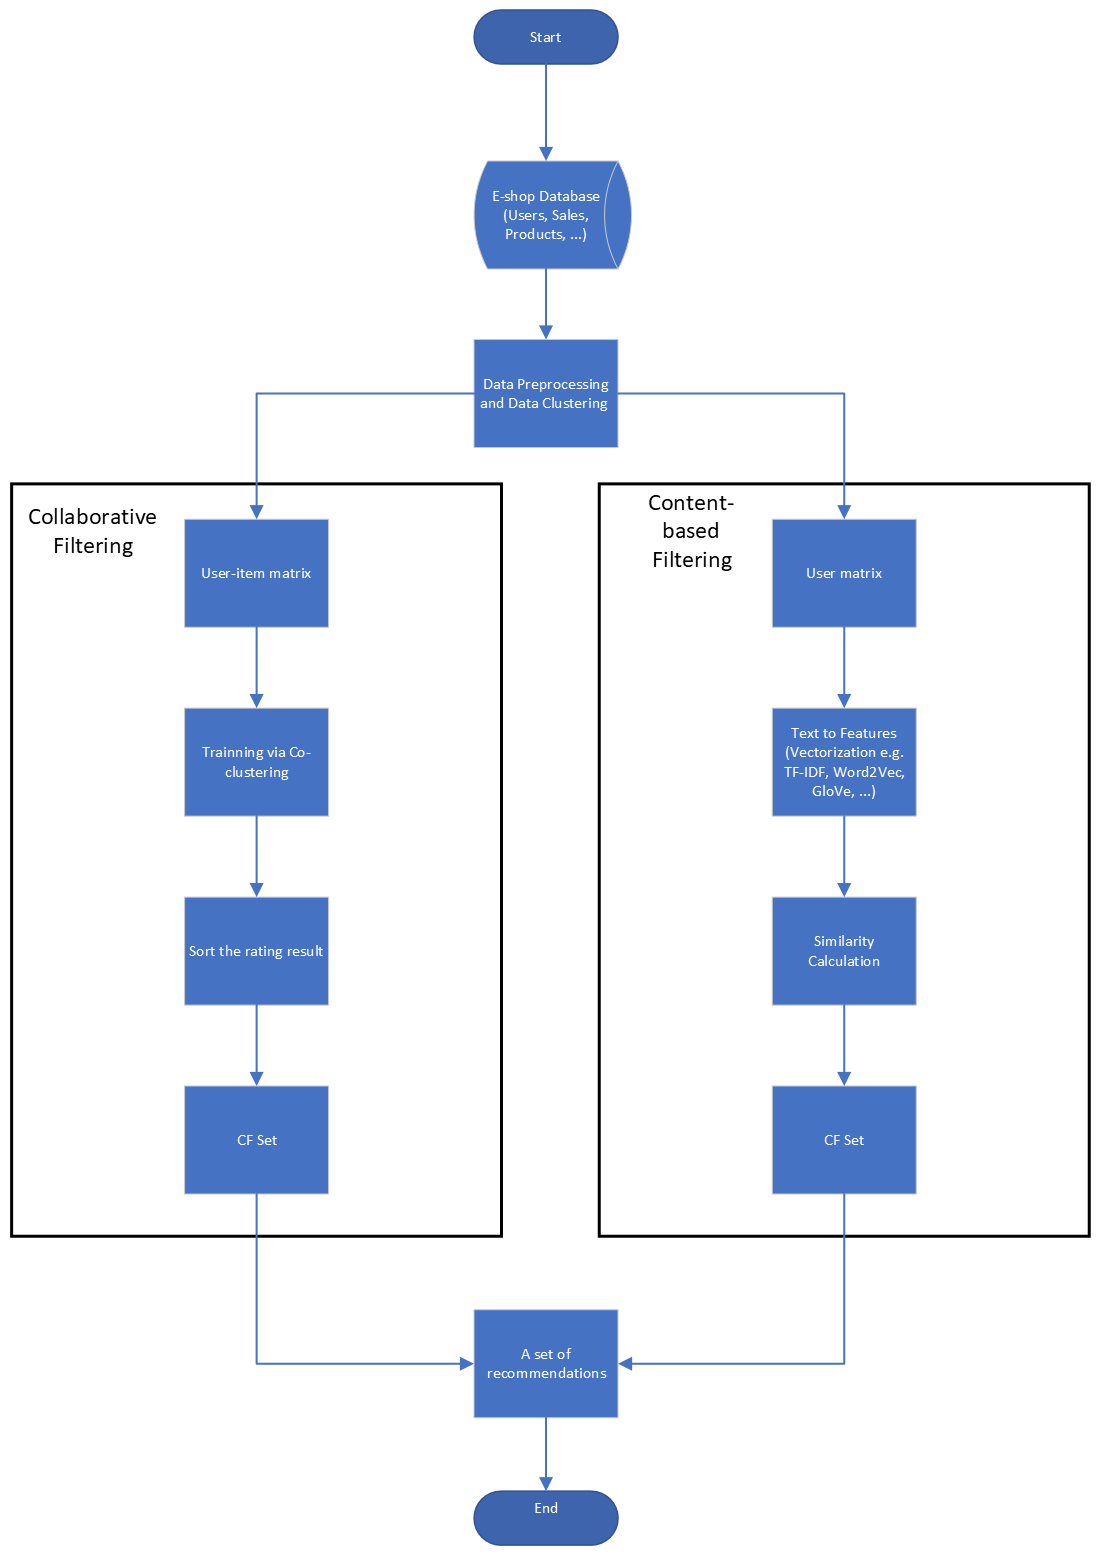

In [61]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
data_path='Datasets/Rec_sys_data.xlsx'# @param {type:"string"}

In [45]:
order_df = pd.read_excel(data_path, 'order')
order_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850
1,536365,71053,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.21,ExpressAir,30.12,17850
2,536365,21730,6,2010-12-01 08:26:00,2010-12-03 08:26:00,0.56,Regular Air,15.22,17850
3,536365,84406B,8,2010-12-01 08:26:00,2010-12-03 08:26:00,0.30,Regular Air,15.22,17850
4,536365,22752,2,2010-12-01 08:26:00,2010-12-04 08:26:00,0.57,Delivery Truck,5.81,17850


In [46]:
product_df=pd.read_excel(data_path,'product')
product_df.head()

,StockCode,Product Name,Description,Category,Brand,Unit Price
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,"New unique design, great gift.High quality pla...",Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Rounded rectangular cat-eye reading glasses. T...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,Each Nintendo 2DS kit is printed with super-hi...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,The sheerest compression stocking in its class...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38
4,84836,Stupell Industries Chevron Initial Wall D cor,Features: -Made in the USA. -Sawtooth hanger o...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99


In [47]:
data_df=pd.merge(order_df,product_df)
data_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID,Product Name,Description,Category,Brand,Unit Price
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
1,536373,84029E,6,2010-12-01 09:02:00,2010-12-02 09:02:00,0.55,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
2,536375,84029E,6,2010-12-01 09:32:00,2010-12-03 09:32:00,0.18,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
3,536396,84029E,6,2010-12-01 10:51:00,2010-12-02 10:51:00,0.06,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
4,536406,84029E,6,2010-12-01 11:33:00,2010-12-03 11:33:00,0.42,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11


In [57]:
data_df.Description = data_df['Product Name'] + ' ' + data_df.Description

unique_df = data_df.drop_duplicates(subset=['Description'], keep='first')

unique_df['desc_lowered'] = unique_df.Description.apply(lambda x: x.lower())

# # Function to remove special characters
# def remove_special_chars(text):
#     # Define the pattern to match
#     pattern = r'[^a-zA-Z0-9\s]'
#     # Replace the special characters with an empty string
#     return re.sub(pattern, '', text)

# # Apply lowercase and remove special characters
# unique_df['lower_desc'] = unique_df['lower_desc'].apply(remove_special_chars)

unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

desc_list = list(unique_df.desc_lowered)

unique_df = unique_df.reset_index(drop=True)

C:\Users\COHOTECH\AppData\Local\Temp\ipykernel_2724\3549431486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['desc_lowered'] = unique_df.Description.apply(lambda x: x.lower())
C:\Users\COHOTECH\AppData\Local\Temp\ipykernel_2724\3549431486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [58]:
unique_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID,Product Name,Description,Category,Brand,Unit Price,desc_lowered
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...","3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11,3 12w x 20d x 20h funston craftsman smooth bra...
1,536365,71053,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.21,ExpressAir,30.12,17850,Awkward Styles Shamrock Flag St. Patrick's Day...,Awkward Styles Shamrock Flag St. Patrick's Day...,Clothing|Men|Mens T-Shirts & Tank Tops|Mens Gr...,Awkward Styles,23.95,awkward styles shamrock flag st patricks day s...
2,536365,21730,6,2010-12-01 08:26:00,2010-12-03 08:26:00,0.56,Regular Air,15.22,17850,Ebe Men Black Rectangle Half Rim Spring Hinge ...,Ebe Men Black Rectangle Half Rim Spring Hinge ...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,26.99,ebe men black rectangle half rim spring hinge ...
3,536365,84406B,8,2010-12-01 08:26:00,2010-12-03 08:26:00,0.30,Regular Air,15.22,17850,MightySkins Skin Decal Wrap Compatible with Ap...,MightySkins Skin Decal Wrap Compatible with Ap...,Electronics|Electronics Learning Center|Ads Fr...,Mightyskins,14.99,mightyskins skin decal wrap compatible with ap...
4,536365,22752,2,2010-12-01 08:26:00,2010-12-04 08:26:00,0.57,Delivery Truck,5.81,17850,awesome since 1948 - 69th birthday gift t-shir...,awesome since 1948 - 69th birthday gift t-shir...,Clothing|Men|Mens T-Shirts & Tank Tops|Mens T-...,Shirtinvaders,49.33,awesome since 1948 69th birthday gift tshirt ...


In [59]:
desc_list

['3 12w x 20d x 20h funston craftsman smooth bracket douglas fir 3 12w x 20d x 20h funston craftsman smooth bracket douglas fir our rustic collection is an instant classic our rustic wood millwork utilizes the technologies of today to build the log and timber wood products that have been in architecture for centuries because our products are not kiln dried each item in our rustic collection is 100 unique and will contain the natural variations that the wood species offers your wood bracket corbel rafter tail will contain unique colors grains textures knots sapwood amp heartwood content and possible sap bleeding and even natural checking splitting amp cracks these natural variations are what make the rustic collection stand out from the rest be proud of your project stand out from the cookiecutter homes use the rustic collection family of products3 12quotw x 20quotd x 20quoth funston craftsman smooth bracket douglas fir',
 'awkward styles shamrock flag st patricks day shirt men irish gi

In [60]:
def find_similarity(cosine_sim_matrix, index, n=10):
    # calculate cosine similarity between each vectors
    result = list(enumerate(cosine_sim_matrix[index]))
    # Sorting the Score
    sorted_result = sorted(result,key=lambda x:x[1],reverse=True)[1:n+1]
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
    return similar_products

## Content-Based Recommendation

In [62]:
tfidf_vec = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,3))

In [66]:
def get_recommendation_tfidf(product_id, df, similarity, n=10):
    '''
    Function to retrieve recommendations based on TF-IDF similarity.
    ----------
    Parameters:
    - `product_id`: Identifier for the product for which similar items are required.
    - `df`: Preprocessed DataFrame containing product information.
    - `similarity`: Method of similarity calculation ("cosine", "manhattan", or "euclidean").
    - `n`: Number of recommendations to return (default is 10).
    ----------
    Returns:
    - List of recommended products based on the chosen similarity measure.
    '''
    row = df.loc[df['StockCode'] == product_id]
    index = list(row.index)[0]
    description = row['desc_lowered'].loc[index]
    #Create vector using tfidf
    tfidf_matrix = tfidf_vec.fit_transform(desc_list)
    if similarity == "cosine":
        sim_matrix = cosine_similarity(tfidf_matrix)
        products = find_similarity(sim_matrix , index)
    # elif similarity == "manhattan":
    #     sim_matrix = manhattan_distances(tfidf_matrix)
    #     products = find_manhattan_distance(sim_matrix , index)
    # else:
    #     sim_matrix = euclidean_distances(tfidf_matrix)
    #     products = find_euclidean_distances(sim_matrix , index)
    return products

In [67]:
# Cosine Similarity
get_recommendation_tfidf('84029E', unique_df, similarity = "cosine", n=10)

[{'value': '3 1/2"W x 32"D x 36"H Traditional Arts & Crafts Smooth Bracket, Douglas Fir',
  'score': 0.75},
 {'value': 'Grobust Natural Balance 180 VCaps', 'score': 0.02},
 {'value': 'COFFEY Street Sign Rustic Chic Sign Home man cave Decor Gift White G41804821',
  'score': 0.02},
 {'value': 'ValueBull Bully Sticks Dog Chews, 6 Inch Regular / Thin, All Natural, 10 Count',
  'score': 0.02},
 {'value': 'Remi Collection 24 Inch Towel Bar', 'score': 0.02},
 {'value': 'Dr. Mercola Natural Flea and Tick Defense - A Repellant To Help Protect Your Pet From Fleas, Ticks, Mosquitoes And Flies - Contains Natural Brazilian Oils - Safe, Natural Pest Deterrent - 8 Fl Oz',
  'score': 0.02},
 {'value': 'Primary Collection Rectangular Activity Table, 30w x 72d x 25h, Fusion Maple',
  'score': 0.02},
 {'value': 'Springhill Digital Opaque Colors Tan, 60lb, Ledger, 11 x 17, 500 Sheets / 1 Ream, Made In The USA',
  'score': 0.02},
 {'value': 'Xu Chang Qing, Paniculate Swallowwort (Cynanchum Paniculatum) Gly

## Collborative Filltering

### User-User Matrix

In [31]:
data1 = data_df.dropna()

In [32]:
data1.StockCode = data1.StockCode.astype(str)

C:\Users\COHOTECH\AppData\Local\Temp\ipykernel_2724\3251052305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.StockCode = data1.StockCode.astype(str)


In [33]:
purchase_df = (data1.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID'))
purchase_df.head()

StockCode,10002,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,...,90214M,90214N,90214R,90214S,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0


In [34]:
def encode_units(x):
    if x < 1: # If the quantity is less than 1
        return 0 # Not purchased
    if x >= 1: # If the quantity is greater than 1
        return 1 # Purchased

In [35]:
user_similarities = cosine_similarity(purchase_df)

In [36]:
user_similarity_data = pd.DataFrame(user_similarities,index=purchase_df.index,columns=purchase_df.index)
user_similarity_data.head()

CustomerID,12346,12347,12348,12350,12352,12353,12354,12355,12356,12358,...,18269,18270,18272,18273,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.054932,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
12347,0.0,1.000000,0.160007,0.018423,0.022183,0.0,0.015584,0.639641,0.162806,0.000000,...,0.077577,0.000000,0.004169,0.0,0.012876,0.030814,0.0,0.0,0.040874,0.150936
12348,0.0,0.160007,1.000000,0.000315,0.001073,0.0,0.011369,0.286599,0.237554,0.001051,...,0.000000,0.000000,0.028152,0.0,0.000000,0.000000,0.0,0.0,0.148903,0.090842
12350,0.0,0.018423,0.000315,1.000000,0.001318,0.0,0.000000,0.000000,0.001238,0.001291,...,0.000000,0.000000,0.025930,0.0,0.000000,0.000000,0.0,0.0,0.028340,0.000000
12352,0.0,0.022183,0.001073,0.001318,1.000000,0.0,0.050090,0.001141,0.073003,0.067742,...,0.113205,0.096845,0.102318,0.0,0.000000,0.000000,0.0,0.0,0.032896,0.031095


In [37]:
def fetch_similar_users(user_id,k=5):
    # separating data rows for the entered user id
    user_similarity = user_similarity_data[user_similarity_data.index == user_id]
    # a data of all other users
    other_users_similarities = user_similarity_data[user_similarity_data.index != user_id]
    # calcuate cosine similarity between user and each other user
    similarities = cosine_similarity(user_similarity,other_users_similarities)[0].tolist()
    user_indices = other_users_similarities.index.tolist()
    index_similarity_pair = dict(zip(user_indices, similarities))
    # sort by similarity
    sorted_index_similarity_pair = sorted(index_similarity_pair.items(),reverse=True)
    top_k_users_similarities = sorted_index_similarity_pair[:k]
    similar_users = [u[0] for u in top_k_users_similarities]
    print('The users with behaviour similar to that of user {0} are:'.format(user_id))
    return similar_users

In [38]:
similar_users = fetch_similar_users(12347)
similar_users

The users with behaviour similar to that of user 12347 are:


[18287, 18283, 18282, 18281, 18280]

In [53]:
def simular_users_recommendation(userid):
    similar_users = fetch_similar_users(userid)
    #obtaining all the items bought by similar users
    simular_users_recommendation_list = []
    for j in similar_users:
        item_list = data1[data1["CustomerID"]==j]['Product Name'].to_list()
        simular_users_recommendation_list.append(item_list)
    #this gives us multi-dimensional list
    # we need to flatten it
    flat_list = []
    for sublist in simular_users_recommendation_list:
        for item in sublist:
            flat_list.append(item)
    final_recommendations_list = list(dict.fromkeys(flat_list))
    # storing 10 random recommendations in a list
    ten_random_recommendations = random.sample(final_recommendations_list, 10)
    print('Items bought by Similar users based on Cosine Similarity')
    #returning 10 random recommendations
    return ten_random_recommendations

In [54]:
simular_users_recommendation(12347)

The users with behaviour similar to that of user 12347 are:
Items bought by Similar users based on Cosine Similarity


["Mediven Vitality Women's Socks - 30-40mmHg Standard Petite MEDIVIT30-40-P",
 'ML7-6 6V 7AH REPLACEMENT BATTERY FOR UPSONIC UPSSLIM 1000 + 6V CHARGER',
 'Ebe Glasses Men Women Rx Reading Rectangular Full Frame Professional TR-90 ckbj0178w',
 'Iguana Med Med Flex II Unisex Stealth Cargo Pant Scrub Bottoms',
 "Harriton Men's Paradise Short-Sleeve Performance Shirt",
 'Business Essentials 8" x 8" x 5" Corrugated Mailers, 12-Pack',
 'Ebe Reading Glasses Mens Womens Tortoise Rectanuglar Chic Anti Glare grade ckbdp9123',
 '6pc Boy Formal Necktie Black & White Suit Set Satin Bow tie Baby Sm-20 Teen',
 "MightySkins Skin Decal Wrap Compatible with Apple Sticker Protective Cover 100's of Color Options",
 'LG X Power Case, K6 Case - Wydan Wallet Leather Credit Card Flip Book Style Folio Kicktand Feature Cover w/ Wrist Strap Anchor - Mint Green']

## Hybrid Recommendation System

In [68]:
data_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID,Product Name,Description,Category,Brand,Unit Price
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...","3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
1,536373,84029E,6,2010-12-01 09:02:00,2010-12-02 09:02:00,0.55,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...","3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
2,536375,84029E,6,2010-12-01 09:32:00,2010-12-03 09:32:00,0.18,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...","3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
3,536396,84029E,6,2010-12-01 10:51:00,2010-12-02 10:51:00,0.06,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...","3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
4,536406,84029E,6,2010-12-01 11:33:00,2010-12-03 11:33:00,0.42,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...","3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271409,569424,23537,2,2011-10-04 10:49:00,2011-10-07 10:49:00,0.46,Delivery Truck,5.81,15529,Ebe Reading Glasses Mens Womens Amber Red Oval...,Ebe Reading Glasses Mens Womens Amber Red Oval...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,36.99
271410,569573,23537,18,2011-10-05 10:11:00,2011-10-06 10:11:00,0.39,ExpressAir,30.12,17511,Ebe Reading Glasses Mens Womens Amber Red Oval...,Ebe Reading Glasses Mens Womens Amber Red Oval...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,36.99
271411,569515,23500,100,2011-10-04 13:58:00,2011-10-06 13:58:00,0.04,Regular Air,15.22,15181,Port Company PC61 Traditional MenÃ¢â‚¬s T-Shir...,Port Company PC61 Traditional MenÃ¢â‚¬s T-Shir...,Clothing|Men|Mens T-Shirts & Tank Tops|Mens T-...,Port & Company,15.16
271412,569546,23465,1,2011-10-04 16:39:00,2011-10-07 16:39:00,0.45,Delivery Truck,5.81,15276,"Z620 Workstation, 2x Xeon E5-2630 v2 2.6GHz Si...","Z620 Workstation, 2x Xeon E5-2630 v2 2.6GHz Si...",Electronics|Computers|Desktop Computers|Deskto...,HP,2155.00
